# Model Analysis Example
This notebook provides some example code for analysing the the behaviour of a model that has been trained using the custom lightning module.

In [7]:
# imports
from data_module import ExampleDataModule
from lightning_module import ExampleDECIModule
import matplotlib.pyplot as plt
import networkx as nx


def print_connections(model):
    variable_groups = list(model.variable_types.keys())
    adj_mat = model.sem_module().mode.graph.detach().cpu().numpy()

    for i, row in enumerate(adj_mat):
        for j, col in enumerate(row):
            if col > 0:
                print(variable_groups[i], "->", variable_groups[j])

The next cell loads the model and data from the saved checkpoint.

In [2]:
data_module = ExampleDataModule.load_from_checkpoint("outputs/last.ckpt")
model = ExampleDECIModule.load_from_checkpoint("outputs/last.ckpt")

data_module.prepare_data()

INFO:torch.distributed.nn.jit.instantiator:Created a temporary directory at /tmp/tmpvp5l58zh
INFO:torch.distributed.nn.jit.instantiator:Writing /tmp/tmpvp5l58zh/_remote_module_non_scriptable.py
INFO:torch.distributed.nn.jit.instantiator:Writing /tmp/tmpvp5l58zh/_remote_module_non_scriptable.py


We can then print the learned graph using the custom `print_connections` function.

In [3]:
print_connections(model)

IT Spend -> New Engagement Strategy
IT Spend -> Planning Summit
Employee Count -> Discount
Employee Count -> New Engagement Strategy
Employee Count -> New Product Adoption
PC Count -> Employee Count
PC Count -> Tech Support
PC Count -> New Product Adoption
PC Count -> Revenue
Size -> IT Spend
Size -> Planning Summit
Size -> Revenue
Tech Support -> New Product Adoption
Tech Support -> Revenue
Discount -> IT Spend
Discount -> Size
Discount -> Tech Support
New Engagement Strategy -> Size
New Engagement Strategy -> Planning Summit
New Engagement Strategy -> Revenue
Planning Summit -> Commercial Flag
Revenue -> Commercial Flag
Revenue -> IT Spend
Revenue -> Discount
Revenue -> New Product Adoption


We can also use networkx to plot the graph.

In [4]:
sem = model.sem_module().mode
graph = sem.graph

In [5]:
graph = nx.from_numpy_array(sem.graph.cpu().numpy(), create_using=nx.DiGraph)
graph = nx.relabel_nodes(graph, dict(enumerate(data_module.dataset_train.keys())))

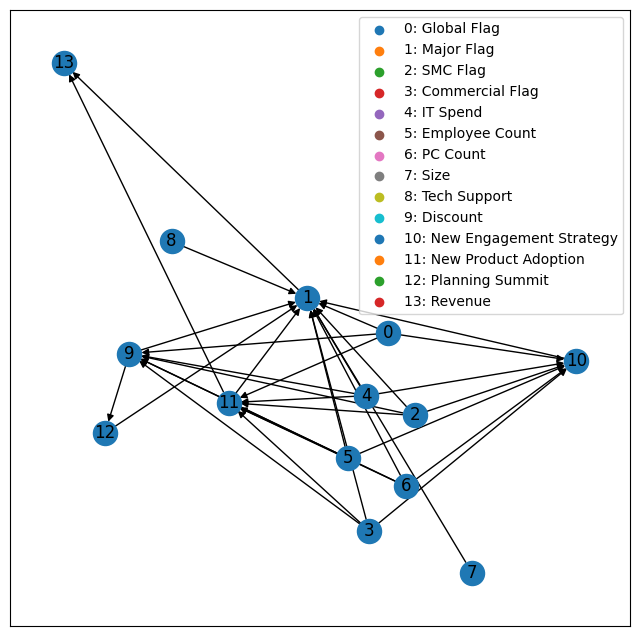

In [6]:
fig, axis = plt.subplots(1, 1, figsize=(8, 8))
true_adj = nx.from_numpy_array(data_module.true_adj.numpy(), create_using=nx.DiGraph)
true_adj = nx.relabel_nodes(true_adj, dict(enumerate(data_module.dataset_train.keys())))
labels = {node: i for i, node in enumerate(data_module.dataset_train.keys())}

try:
    layout = nx.nx_agraph.graphviz_layout(true_adj, prog="dot")
except (ModuleNotFoundError, ImportError):
    layout = nx.layout.spring_layout(true_adj)

for node, i in labels.items():
    axis.scatter(layout[node][0], layout[node][1], label=f"{i}: {node}")
axis.legend()
nx.draw_networkx(true_adj, pos=layout, with_labels=True, arrows=True, labels=labels, ax=axis)

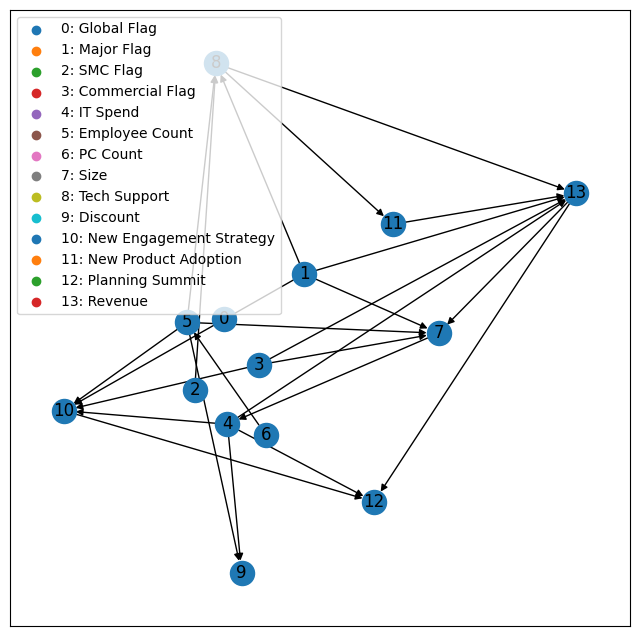

In [5]:
graph = nx.from_numpy_array(sem.graph.cpu().numpy(), create_using=nx.DiGraph)
graph = nx.relabel_nodes(graph, dict(enumerate(data_module.dataset_train.keys())))

fig, axis = plt.subplots(1, 1, figsize=(8, 8))

for node, i in labels.items():
    axis.scatter(layout[node][0], layout[node][1], label=f"{i}: {node}")
axis.legend()

nx.draw_networkx(graph, pos=layout, with_labels=True, arrows=True, labels=labels, ax=axis)